In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
file = '../publication_database.csv'
images = '../publication_images'
from pyrrhenious import database
from pyrrhenious import utils as pyrutils
import checking_author as check_auth
ecdatabase = database.Database(file)
phases = ecdatabase.get_phases()
model_names = ecdatabase.get_model_list_for_phase('garnet')

# Exploring Pyrrhenious's Garnet Models Database Correspondence

Here we look at the garnet models parameterization correspondence of:

 * Xu S. and Shankland Thomas J., 1999. Electrical conductivity of orthopyroxene and its high pressure phases

 * Yoshino et al., 2008. Electrical conductivity of majorite garnet and its implications for electrical structure in the mantle transition zone
 
 * Dai K. and Karato S. 2009. Electrical conductivity of pyrope-rich garnet at high temperature and high pressure
 
 * Dai et al., 2012. The effect of chemical composition and oxygen fugacity on the electrical conductivity of dry and hydrous garnet at high temperatures and pressures
 
 * Dai et al., 2013. Electrical conductivity of Alm82Py15Grs3 almandine-rich garnet determined by impedance spectroscopy at high temperatures and high pressures.
 
 * Liu et al., 2019. Electrical conductivity of OH-bearing omphacite and garnet in eclogite: the quantitative dependence on water content
 
Some authors (e.g. Romano et al., 2006) do not provide universal parameterizations which explain the majority of the reported data. In other cases, (e.g. Dai et al.,'s) 'universal' fits do not exactly match the linear fits shown on the graph. Some parameter fits (e.g. Yoshino et al., 2008) had to be adjusted slightly in order to overly the linear regressions shown on the publication images. Finally, in some cases (e.g. Yoshino et al., 2008) a combination of reported low and high temperature mechanisms was created by adjusting preexponential constants to match trends seen in the figures. 
 
 
## Xu and Shankland 1999
 

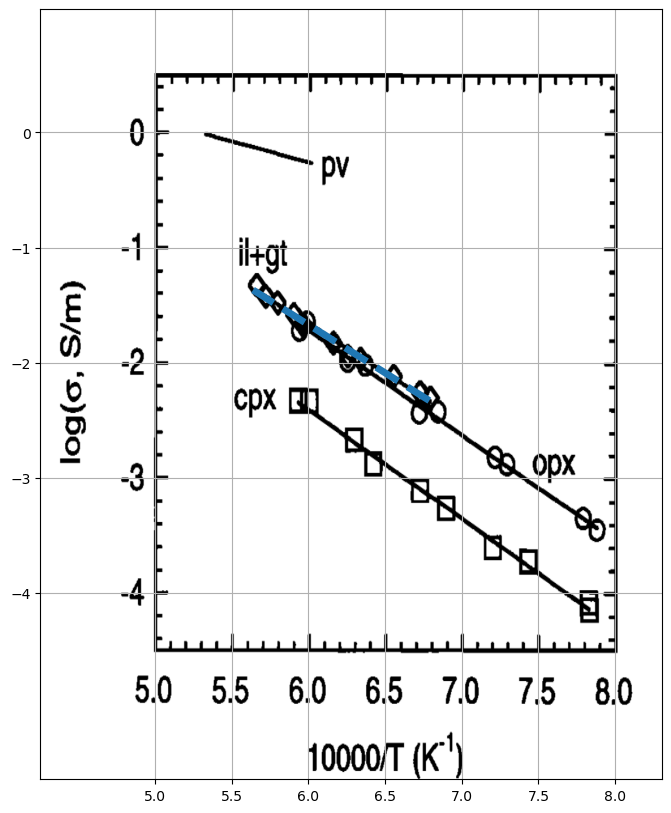

In [2]:
index = 0
model = model_names[index]
ec_model_row = ecdatabase.get_model_properties(model)
pngs, extents, aspects, xticks, yticks = check_auth.get_fig_data(ec_model_row, images)
temperature_range = np.linspace(ec_model_row['temp_min'],ec_model_row['temp_max'],num=100,dtype=float).ravel()
model = ecdatabase.get_model(model)
for png, ext, asp, xt, yt in zip(pngs,extents,aspects,xticks,yticks):
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    conductivity4 = model.get_conductivity(T=temperature_range)
    ax.plot(1e4/temperature_range,np.log10(conductivity4),linestyle='--',linewidth=5)

## Liu et al., 2019

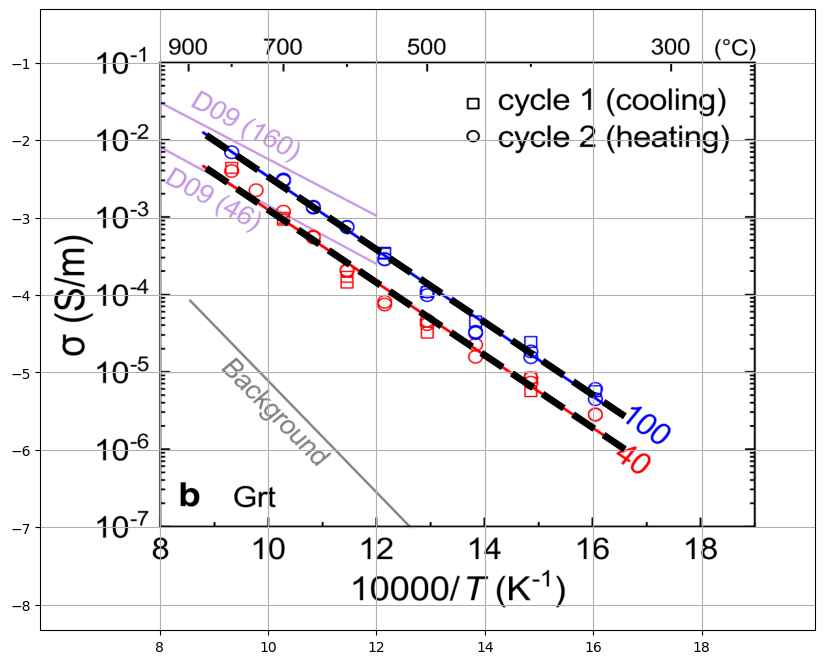

In [3]:
index = 1
model = model_names[index]
ec_model_row = ecdatabase.get_model_properties(model)
pngs, extents, aspects, xticks, yticks =check_auth.get_fig_data(ec_model_row, images)
temperature_range = np.linspace(ec_model_row['temp_min']-20,ec_model_row['temp_max']+75,num=100,dtype=float).ravel()
model = ecdatabase.get_model(model)

for png, ext, asp, xt, yt in zip(pngs,extents,aspects,xticks,yticks):
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    
    conductivity1 = model.get_conductivity(T=temperature_range,Cw=40)
    conductivity2 = model.get_conductivity(T=temperature_range,Cw=100)
    ax.plot(1e4/temperature_range,np.log10(conductivity1),color='black',linestyle='--',linewidth=5)
    ax.plot(1e4/temperature_range,np.log10(conductivity2),color='black',linestyle='--',linewidth=5)
    break


## Dai L. and Karato S. 2009

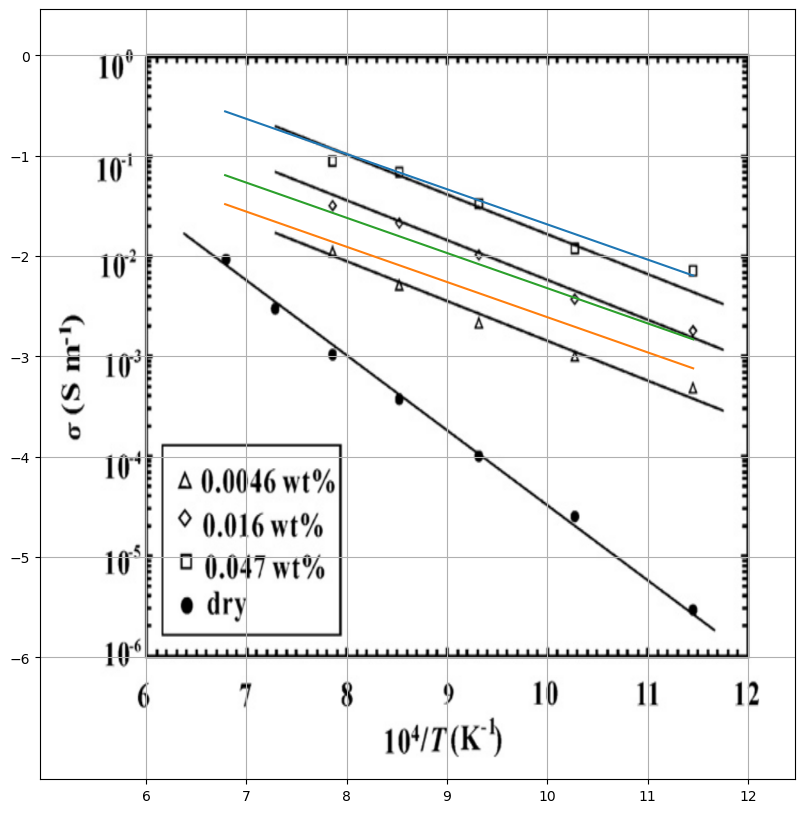

In [4]:
index = 2
model = model_names[index]
ec_model_row = ecdatabase.get_model_properties(model)
pngs, extents, aspects, xticks, yticks =check_auth.get_fig_data(ec_model_row, images)
temperature_range = np.linspace(873,1473,num=100,dtype=float).ravel()
model = ecdatabase.get_model(model)
for png, ext, asp, xt, yt in zip(pngs,extents,aspects,xticks,yticks):
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    conductivity1 = model.get_conductivity(T=temperature_range,Cw=0.047*1e4,P=5)
    conductivity2 = model.get_conductivity(T=temperature_range,Cw=0.0016*1e4,P=5)
    conductivity3 = model.get_conductivity(T=temperature_range,Cw=0.0046*1e4,P=5)
    ax.plot(1e4/temperature_range,np.log10(conductivity1))
    ax.plot(1e4/temperature_range,np.log10(conductivity2))
    ax.plot(1e4/temperature_range,np.log10(conductivity3))
    

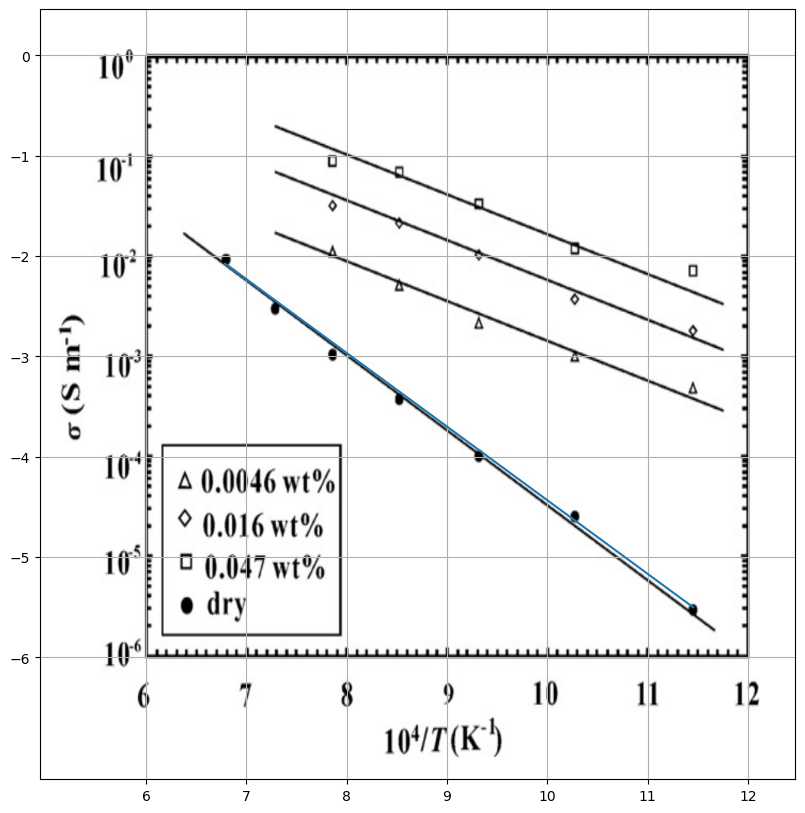

In [5]:
index = 3
model = model_names[index]
ec_model_row = ecdatabase.get_model_properties(model)
pngs, extents, aspects, xticks, yticks =check_auth.get_fig_data(ec_model_row, images)
temperature_range = np.linspace(ec_model_row['temp_min'],ec_model_row['temp_max'],num=100,dtype=float).ravel()
model = ecdatabase.get_model(model)

for png, ext, asp, xt, yt in zip(pngs,extents,aspects,xticks,yticks):
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    conductivity1 = model.get_conductivity(T=temperature_range,Cw=0,P=5)
    ax.plot(1e4/temperature_range,np.log10(conductivity1))


## Dai L. et al., 2012

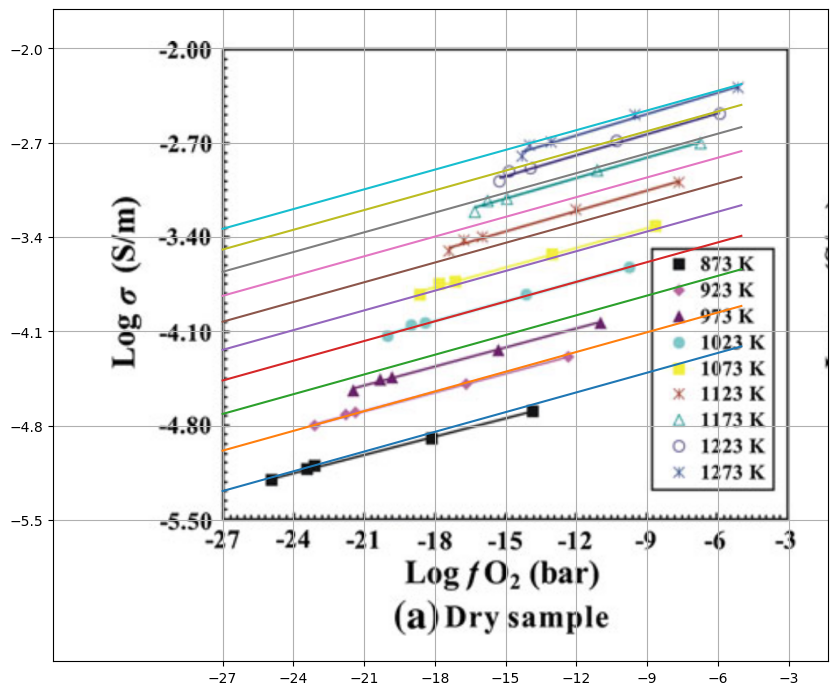

In [6]:
index = 4
model = model_names[index]
ec_model_row = ecdatabase.get_model_properties(model)
pngs, extents, aspects, xticks, yticks =check_auth.get_fig_data(ec_model_row, images)
model = ecdatabase.get_model(model)
for i, (png, ext, asp, xt, yt) in enumerate(zip(pngs,extents,aspects,xticks,yticks)):
    logfO2 = np.linspace(-27,-5,num=100)
    if i==0:
        fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
        for T in np.arange(873,1373,50)+110:
            conductivity1 = model.get_conductivity(T=T,logfo2=logfO2*8e-1)
            ax.plot(logfO2,np.log10(conductivity1))

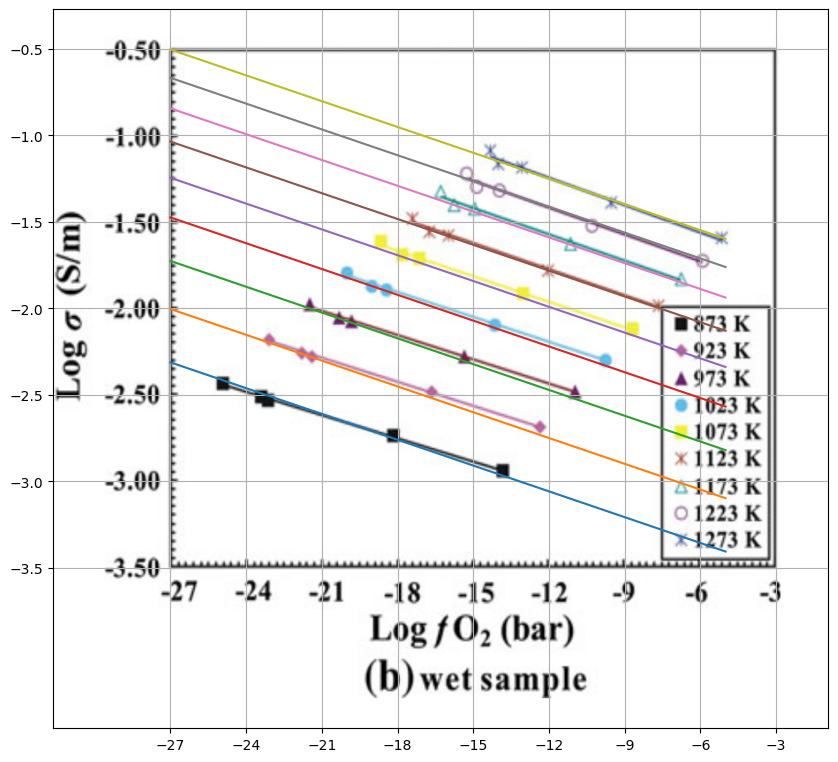

In [7]:
index = 5
model = model_names[index]
ec_model_row = ecdatabase.get_model_properties(model)
pngs, extents, aspects, xticks, yticks =check_auth.get_fig_data(ec_model_row, images)
for i, (png, ext, asp, xt, yt) in enumerate(zip(pngs,extents,aspects,xticks,yticks)):
    logfO2 = np.linspace(-27,-5,num=100)
    if i==1:
        fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
        for T in np.arange(973,1473,60)+120:
            conductivity1 = ec_model_row['ec_model'].iloc[0].get_conductivity(T=T,logfo2=logfO2*7e-1)
            ax.plot(logfO2,np.log10(conductivity1))

## Dai L. et al., 2013

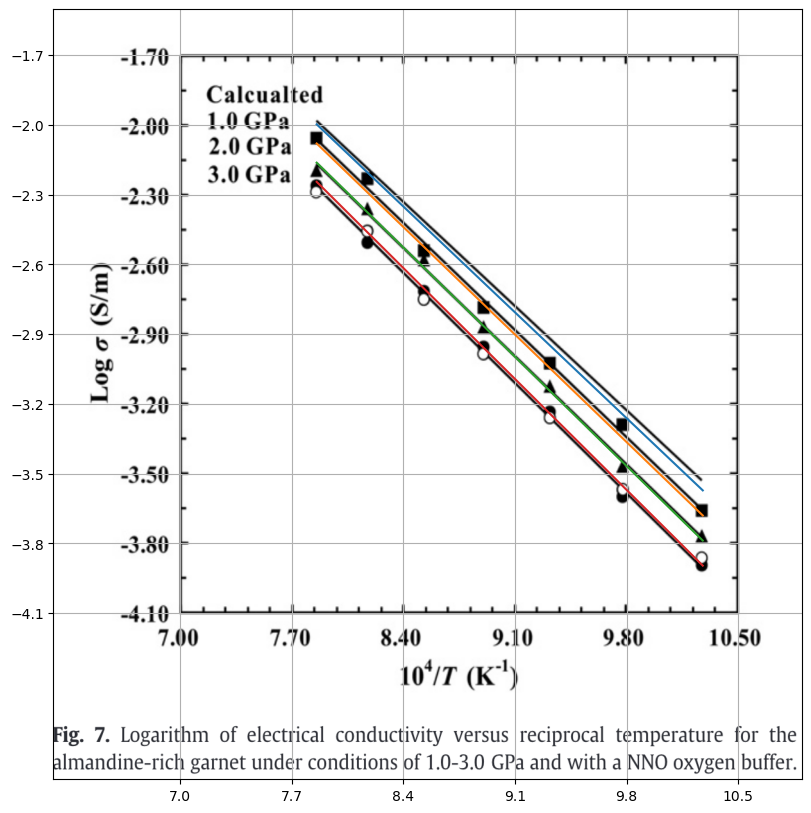

In [8]:
index = 6
model = model_names[index]
ec_model_row = ecdatabase.get_model_properties(model)
pngs, extents, aspects, xticks, yticks =check_auth.get_fig_data(ec_model_row, images)
for i, (png, ext, asp, xt, yt) in enumerate(zip(pngs,extents,aspects,xticks,yticks)):
    if i==1:
        temperature_range = np.linspace(ec_model_row['temp_min'],ec_model_row['temp_max'],num=100,dtype=float).ravel()
        fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
        for P in [0,1,2,3]:
            conductivity1 = ec_model_row['ec_model'].iloc[0].get_conductivity(T=temperature_range,P=P)
            ax.plot(1e4/temperature_range,np.log10(conductivity1))

## Yoshino et al., 2008

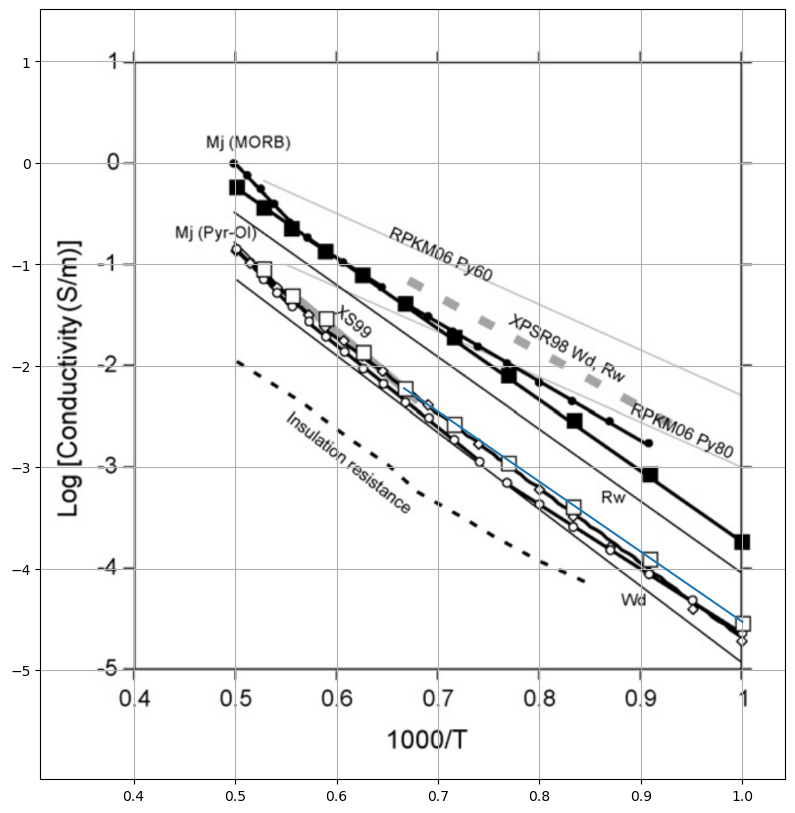

In [9]:
index = 7
model = model_names[index]
ec_model_row = ecdatabase.get_model_properties(model)
pngs, extents, aspects, xticks, yticks =check_auth.get_fig_data(ec_model_row, images)
temperature_range = np.linspace(ec_model_row['temp_min'],ec_model_row['temp_max'],num=100,dtype=float).ravel()
for png, ext, asp, xt, yt in zip(pngs,extents,aspects,xticks,yticks):
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    conductivity1 = ec_model_row['ec_model'].iloc[0].get_conductivity(T=temperature_range)
   
    ax.plot(1e3/temperature_range,np.log10(conductivity1))
    

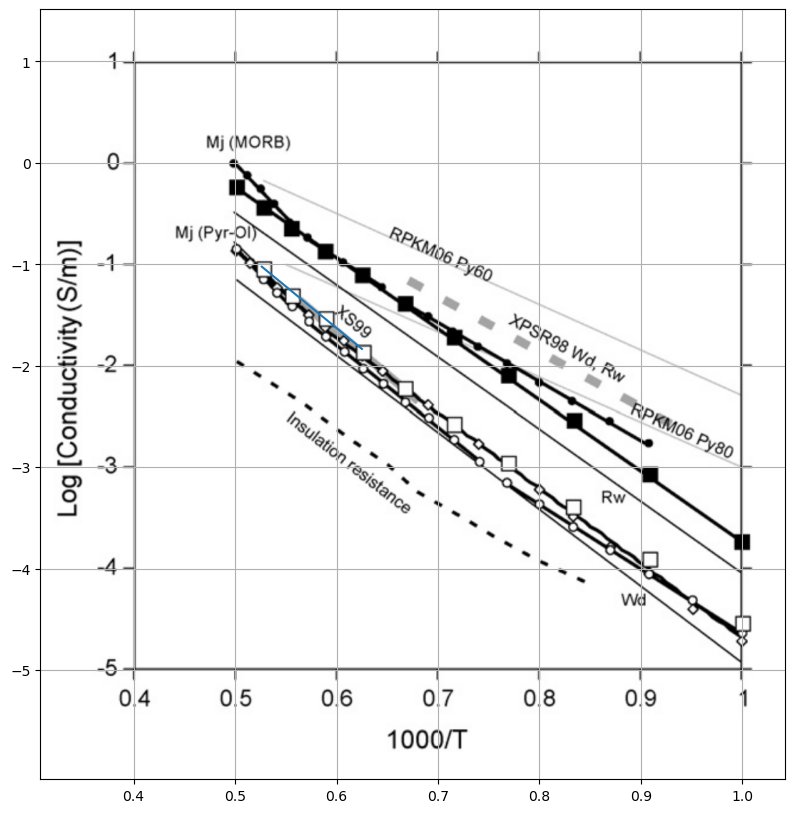

In [10]:
index = 8
model = model_names[index]
ec_model_row = ecdatabase.get_model_properties(model)
pngs, extents, aspects, xticks, yticks =check_auth.get_fig_data(ec_model_row, images)
temperature_range = np.linspace(ec_model_row['temp_min'],ec_model_row['temp_max'],num=100,dtype=float).ravel()
for png, ext, asp, xt, yt in zip(pngs,extents,aspects,xticks,yticks):
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    conductivity1 = ec_model_row['ec_model'].iloc[0].get_conductivity(T=temperature_range)
   
    ax.plot(1e3/temperature_range,np.log10(conductivity1))
    

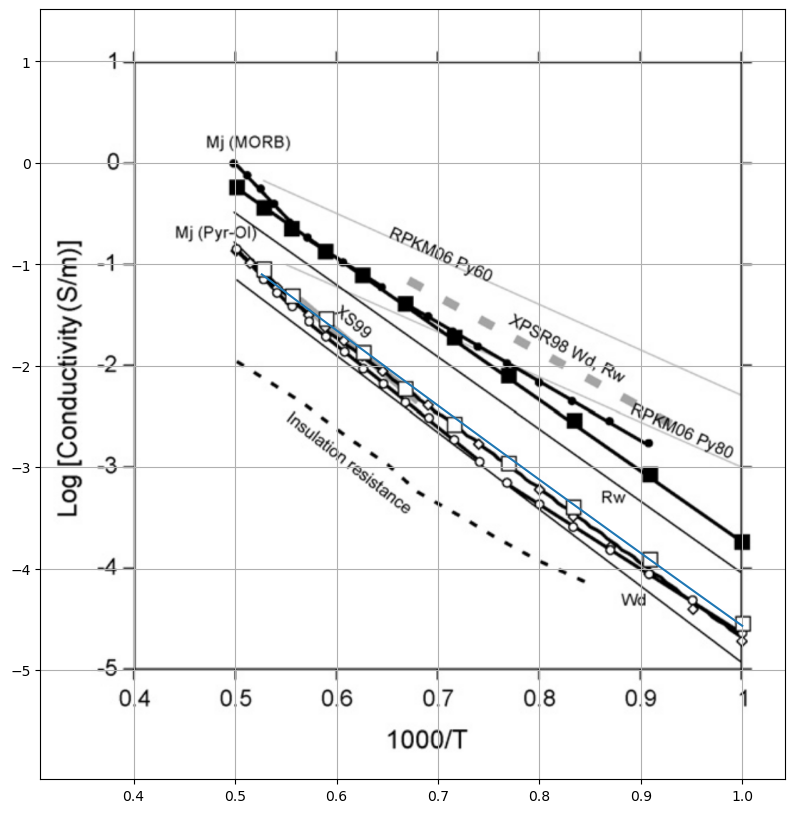

In [11]:
index = 9
model = model_names[index]
ec_model_row = ecdatabase.get_model_properties(model)
pngs, extents, aspects, xticks, yticks =check_auth.get_fig_data(ec_model_row, images)
temperature_range = np.linspace(ec_model_row['temp_min'],ec_model_row['temp_max'],num=100,dtype=float).ravel()
for png, ext, asp, xt, yt in zip(pngs,extents,aspects,xticks,yticks):
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    conductivity1 = ec_model_row['ec_model'].iloc[0].get_conductivity(T=temperature_range)
   
    ax.plot(1e3/temperature_range,np.log10(conductivity1))

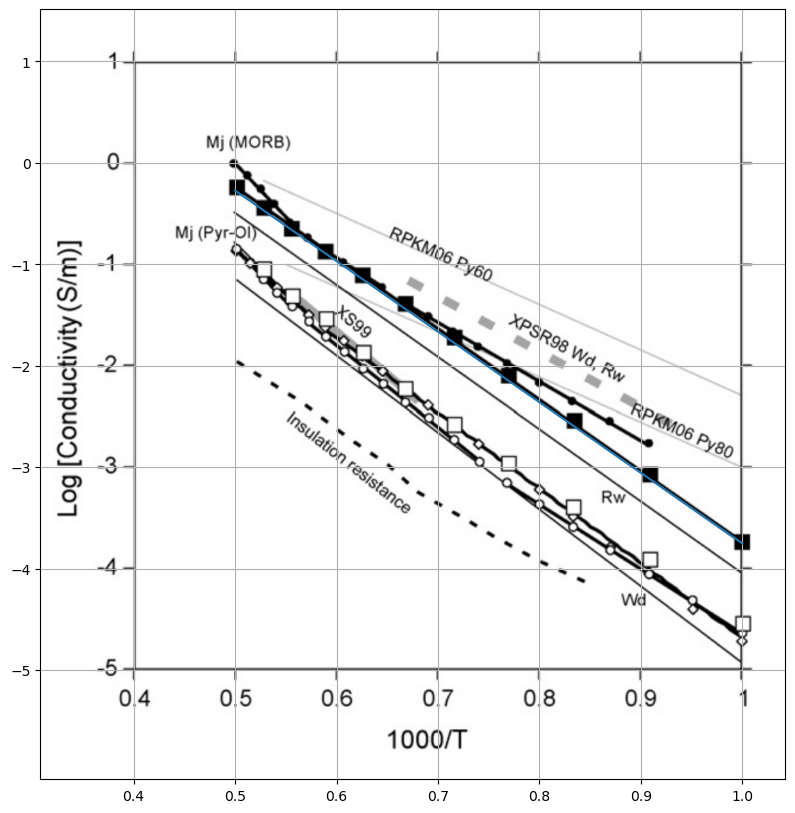

In [12]:
index = 10
model = model_names[index]
ec_model_row = ecdatabase.get_model_properties(model)
pngs, extents, aspects, xticks, yticks =check_auth.get_fig_data(ec_model_row, images)
temperature_range = np.linspace(1000,ec_model_row['temp_max'],num=100,dtype=float).ravel()
for png, ext, asp, xt, yt in zip(pngs,extents,aspects,xticks,yticks):
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    conductivity1 = ec_model_row['ec_model'].iloc[0].get_conductivity(T=temperature_range)
   
    ax.plot(1e3/temperature_range,np.log10(conductivity1))

/var/folders/5h/95y6jy4s2pb02h07pf5q7dgc0000gn/T/ipykernel_68296/3558587101.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  linewidth=2,label=model,color=cm.get_cmap('YlGn')(i/5))
/var/folders/5h/95y6jy4s2pb02h07pf5q7dgc0000gn/T/ipykernel_68296/3558587101.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  linewidth=2,label=model,color=cm.get_cmap('YlOrRd')(i/4))


Text(0, 0.5, 'log10(sigma)')

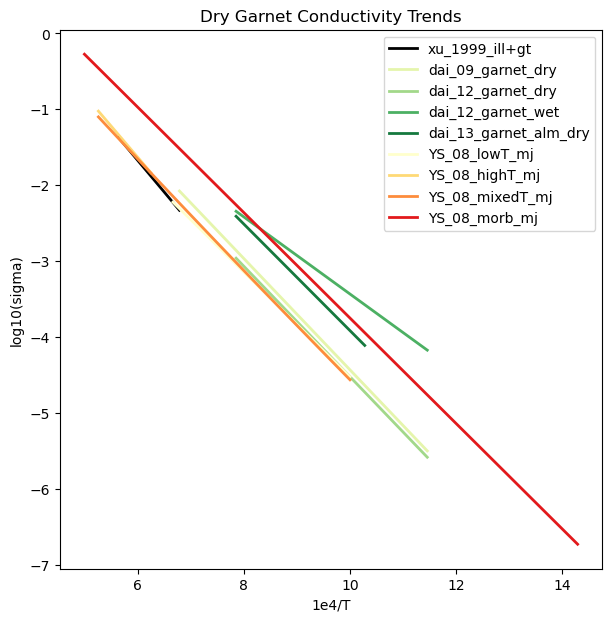

In [13]:
import matplotlib.cm as cm
P = 5 # GPa
t = np.linspace(773,2273,num=100)
logfo2 = pyrutils.calc_QFM(t,P)
phases = ecdatabase.get_phases()
model_names = ecdatabase.get_model_list_for_phase('garnet')
fix, ax = plt.subplots(figsize=(7,7))
for i, model in enumerate(filter(lambda x : 'xu' in x, model_names)):
    ec_model_row = ecdatabase.get_model_properties(model)
    ec_model = ec_model_row['ec_model'].iloc[0]
    temperature_range = np.linspace(ec_model_row['temp_mink'],
                                    ec_model_row['temp_maxk'],num=100,dtype=float).ravel()
    logfo2 = pyrutils.calc_QFM(temperature_range,P)
    ax.plot(1e4/temperature_range,
            np.log10(ec_model.get_conductivity(T=temperature_range,P=P,logfo2=logfo2)),
            linewidth=2,label=model,color='black')
for i, model in enumerate(filter(lambda x : 'dai' in x, model_names)):
    
    ec_model_row = ecdatabase.get_model_properties(model)
    ec_model = ec_model_row['ec_model'].iloc[0]
    if ec_model.uses_water:
        continue
    temperature_range = np.linspace(ec_model_row['temp_mink'],
                                    ec_model_row['temp_maxk'],num=100,dtype=float).ravel()
    logfo2 = pyrutils.calc_QFM(temperature_range,P)
    ax.plot(1e4/temperature_range,
            np.log10(ec_model.get_conductivity(T=temperature_range,P=P,logfo2=logfo2)),
            linewidth=2,label=model,color=cm.get_cmap('YlGn')(i/5))
    
for i, model in enumerate(filter(lambda x : 'YS' in x, model_names)):
    ec_model_row = ecdatabase.get_model_properties(model)
    ec_model = ec_model_row['ec_model'].iloc[0]
    temperature_range = np.linspace(ec_model_row['temp_mink'],
                                    ec_model_row['temp_maxk'],num=100,dtype=float).ravel()
    logfo2 = pyrutils.calc_QFM(temperature_range,P)
    ax.plot(1e4/temperature_range,
            np.log10(ec_model.get_conductivity(T=temperature_range,P=P,logfo2=logfo2)),
            linewidth=2,label=model,color=cm.get_cmap('YlOrRd')(i/4))
plt.legend()
plt.title('Dry Garnet Conductivity Trends')
plt.xlabel('1e4/T')
plt.ylabel('log10(sigma)')


/var/folders/5h/95y6jy4s2pb02h07pf5q7dgc0000gn/T/ipykernel_68296/4045202548.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  label=model+f' {ppm_h2o} ppm Water',color=cm.get_cmap('cool_r')(i/5))


(-8.0, 0.0)

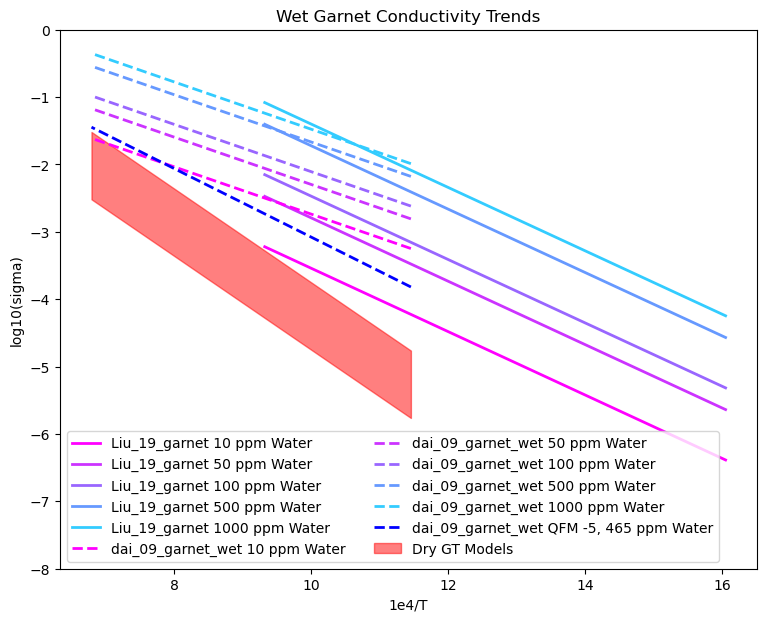

In [14]:
import matplotlib.cm as cm
P = 5 # GPa
t = np.linspace(773,2273,num=100)
logfo2 = pyrutils.calc_QFM(t,P)
phases = ecdatabase.get_phases()
model_names = ecdatabase.get_model_list_for_phase('garnet')
model_names = list(filter(lambda x : ecdatabase.get_model_properties(x).iloc[0]['ec_model'].uses_water,
                          model_names))
fix, ax = plt.subplots(figsize=(9,7))
for model in model_names:
    
    if 'dai' in model:
        linestyle= '--'
    else:
        linestyle='-'
    ec_model_row = ecdatabase.get_model_properties(model)
    ec_model = ec_model_row['ec_model'].iloc[0]
    temperature_range = np.linspace(ec_model_row['temp_mink'],
                                    ec_model_row['temp_maxk'],num=100,dtype=float).ravel()
    logfo2 = pyrutils.calc_QFM(temperature_range,P)
    for i, ppm_h2o in enumerate([10,50,100,500,1000]):
        c = ec_model.get_conductivity(T=temperature_range,P=P,
                                               logfo2=logfo2,Cw=ppm_h2o)
        ax.plot(1e4/temperature_range,
            np.log10(c),
            linewidth=2,linestyle=linestyle,
                label=model+f' {ppm_h2o} ppm Water',color=cm.get_cmap('cool_r')(i/5))
        
ec_model_row = ecdatabase.get_model_properties('dai_12_garnet_wet')
ec_model_12 = np.log10(ec_model_row['ec_model'].iloc[0].get_conductivity(T=temperature_range,
                                                                     logfo2=logfo2-5))
ax.plot(1e4/temperature_range,
            ec_model_12,
            linewidth=2,linestyle=linestyle,
                label=model+f' QFM -5, 465 ppm Water',color='b',zorder=8)

ec_model_row = ecdatabase.get_model_properties('YS_08_morb_mj')
ec_model = np.log10(ec_model_row['ec_model'].iloc[0].get_conductivity(T=temperature_range))
ax.fill_between(1e4/temperature_range,ec_model-1,ec_model,label='Dry GT Models',color='red',alpha=0.5) 
plt.legend(ncols=2)
plt.title('Wet Garnet Conductivity Trends')
plt.xlabel('1e4/T')
plt.ylabel('log10(sigma)')
plt.ylim([-8,0])